# Study 1: Model Evaluation Reliability

In [4]:
import pandas as pd
import sys, os
from matplotlib import pyplot as plt
import seaborn as sns

## Load the evaluation data

In [42]:
data = pd.read_csv('../out/study1.csv')
data

,metric,estimator,mean,bias,variance,n,i,dataset
0,CCC,In-Sample,0.775772,0.791426,NaN,50,0,simple
1,CCC,2-Fold CV,0.167016,0.182670,1.116845e-03,50,0,simple
2,CCC,5-Fold CV,0.346865,0.362519,1.410255e-02,50,0,simple
3,CCC,10-Fold CV,0.356479,0.372134,2.013787e-01,50,0,simple
4,CCC,LOOCV,0.242331,0.257986,NaN,50,0,simple
...,...,...,...,...,...,...,...,...
95955,r2,In-Sample,0.393944,0.383210,NaN,500,199,simple
95956,r2,2-Fold CV,0.001343,-0.009391,8.099098e-07,500,199,simple
95957,r2,5-Fold CV,0.001764,-0.008970,1.215726e-06,500,199,simple
95958,r2,10-Fold CV,0.018298,0.007564,4.340068e-04,500,199,simple


## Figure 1: Model Evaluation Reliability (Bias)

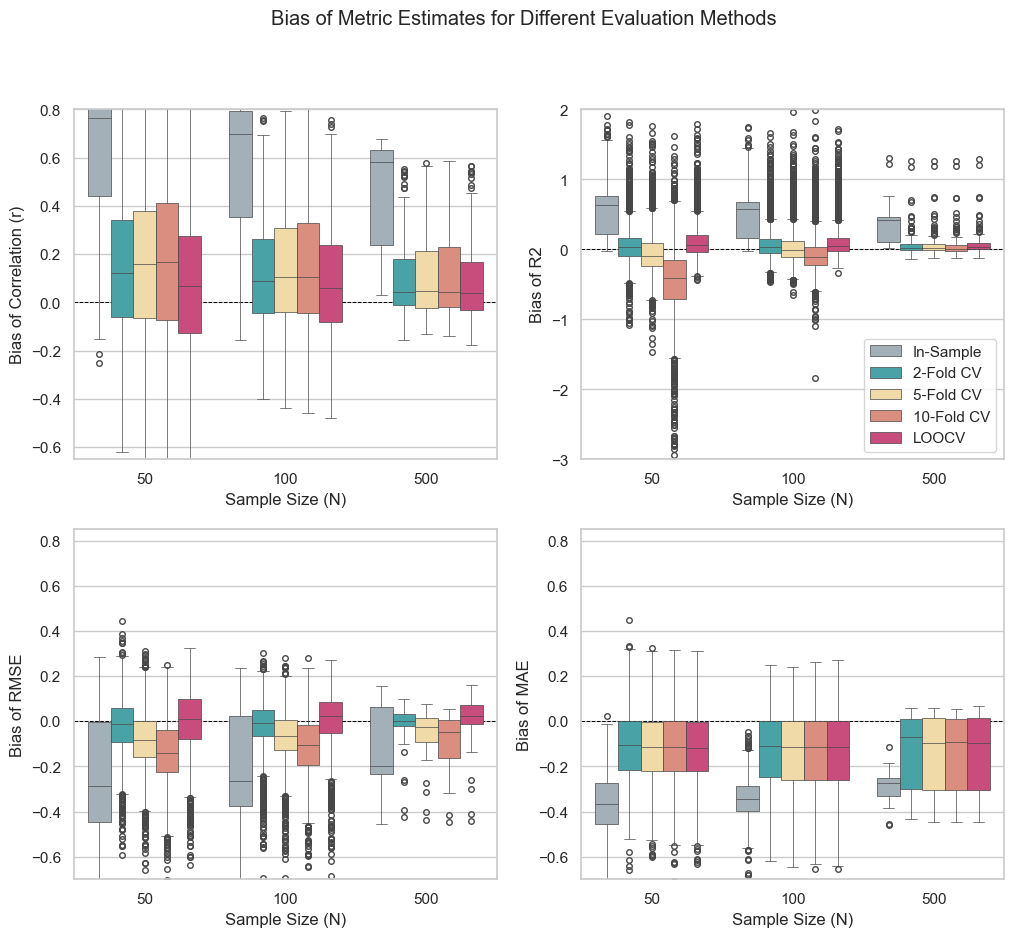

In [7]:
sns.set_theme(style="whitegrid")
palette = ["#A0B1BA", "#39B1B5", "#FCDE9C", "#E88471", "#DC3977"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, m in enumerate(["r", "RMSE", "R2", "MAE"]):
    j = i % 2
    k = i // 2
    ax = axes[j][k]
    ax.axhline(
        y=0,
        color="black",
        linestyle="--",
        linewidth=0.7,
    )
    sns.boxplot(
        x="n",
        y="bias",
        hue="estimator",
        data=data.query("metric == '%s'" % m),
        linewidth=0.5,
        fliersize=4,
        palette=palette,
        ax=ax,
    )
    ax.set_xlabel("Sample Size (N)")
    ax.set_ylabel(m)

# r
# axes[0][0].set_title("Correlation (r)")
axes[0][0].set_ylim(-0.65, 0.8)
axes[0][0].set_ylabel("Bias of Correlation (r)")
# R2
# axes[0][1].set_title("Coefficient of Determination (R2)")
axes[0][1].set_ylim(-2.5, 1.3)
# axes[0][1].set_yscale("symlog", base=2)
axes[0][1].set_yticks([-3, -2, -1, 0, 1, 2])
axes[0][1].set_ylabel("Bias of R2")

# RMSE
# axes[1][0].set_title("Root Mean Squared Error (RMSE)")
axes[1][0].set_ylim(-0.7, 0.85)
axes[1][0].set_ylabel("Bias of RMSE")

# MAE
# axes[1][1].set_title("Mean Absolute Error (MAE)")
axes[1][1].set_ylim(-0.7, 0.85)
axes[1][1].set_ylabel("Bias of MAE")

# legend
axes[0][0].get_legend().remove()
axes[0][1].legend(loc="lower right", ncol=1)
axes[1][0].get_legend().remove()
axes[1][1].get_legend().remove()

# show
fig.suptitle("Bias of Metric Estimates for Different Evaluation Methods")
fig.savefig("../out/study1a.png", dpi=300)

## Figure 2: Model Evaluation Reliability (Variance)

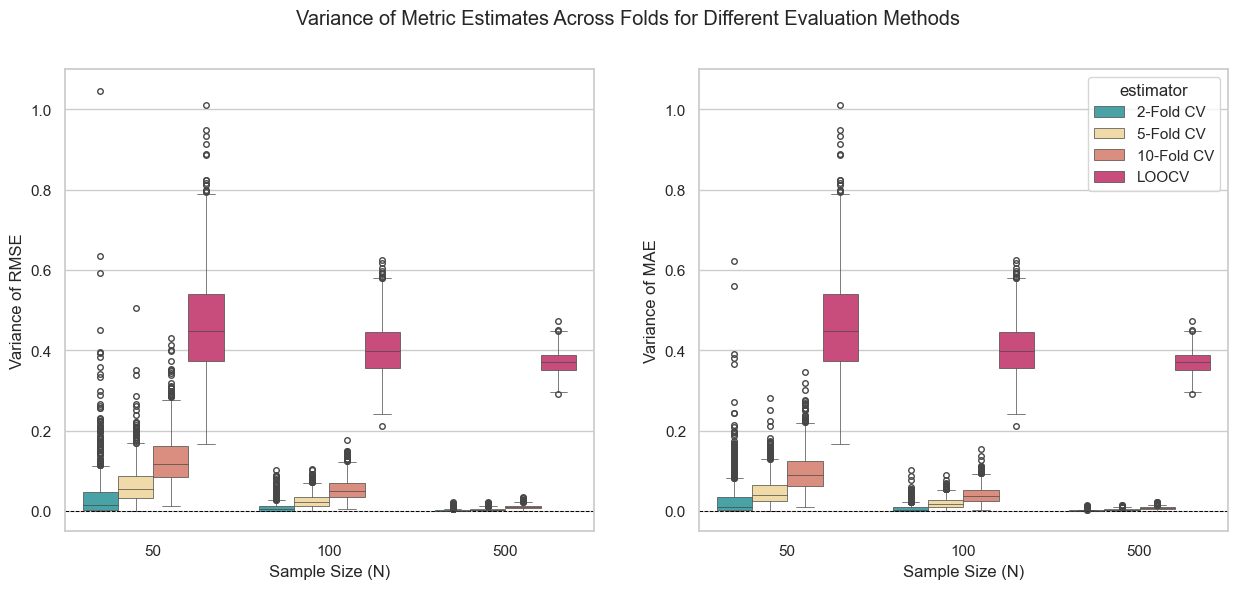

In [63]:
sns.set_theme(style="whitegrid")
palette = ["#39B1B5", "#FCDE9C", "#E88471", "#DC3977"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, m in enumerate(["RMSE", "MAE"]):
    sns.boxplot(
        data=data.query(f"metric == '{m}' and estimator != 'In-Sample'"),
        x="n", y="variance",
        hue="estimator",
        linewidth=0.5,
        fliersize=4,
        palette=palette,
        ax=axes[i],
    )
    axes[i].axhline(
        y=0,
        color="black",
        linestyle="--",
        linewidth=0.7,
    )
    axes[i].set_ylim(-0.05, 1.1)
    axes[i].set_xlabel("Sample Size (N)")

# RMSE
axes[0].get_legend().remove()
axes[0].set_ylabel("Variance of RMSE")

# MAE
axes[1].set_ylabel("Variance of MAE")

fig.suptitle("Variance of Metric Estimates Across Folds for Different Evaluation Methods")
fig.savefig("out/study1b.png", dpi=300)

In [45]:
data.query("dataset=='spectral'")

,metric,estimator,mean,bias,variance,n,i,dataset
40,CCC,In-Sample,0.646328,0.646328,NaN,50,0,spectral
41,CCC,2-Fold CV,0.456310,0.456310,0.037599,50,0,spectral
42,CCC,5-Fold CV,0.610217,0.610217,0.007095,50,0,spectral
43,CCC,10-Fold CV,0.584547,0.584547,0.179077,50,0,spectral
44,CCC,LOOCV,0.557589,0.557589,NaN,50,0,spectral
...,...,...,...,...,...,...,...,...
95915,r2,In-Sample,0.469615,0.458255,NaN,500,198,spectral
95916,r2,2-Fold CV,0.433094,0.421734,0.000673,500,198,spectral
95917,r2,5-Fold CV,0.461098,0.449738,0.005395,500,198,spectral
95918,r2,10-Fold CV,0.465954,0.454594,0.012600,500,198,spectral


/opt/homebrew/Caskroom/miniconda/base/envs/pyniche/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


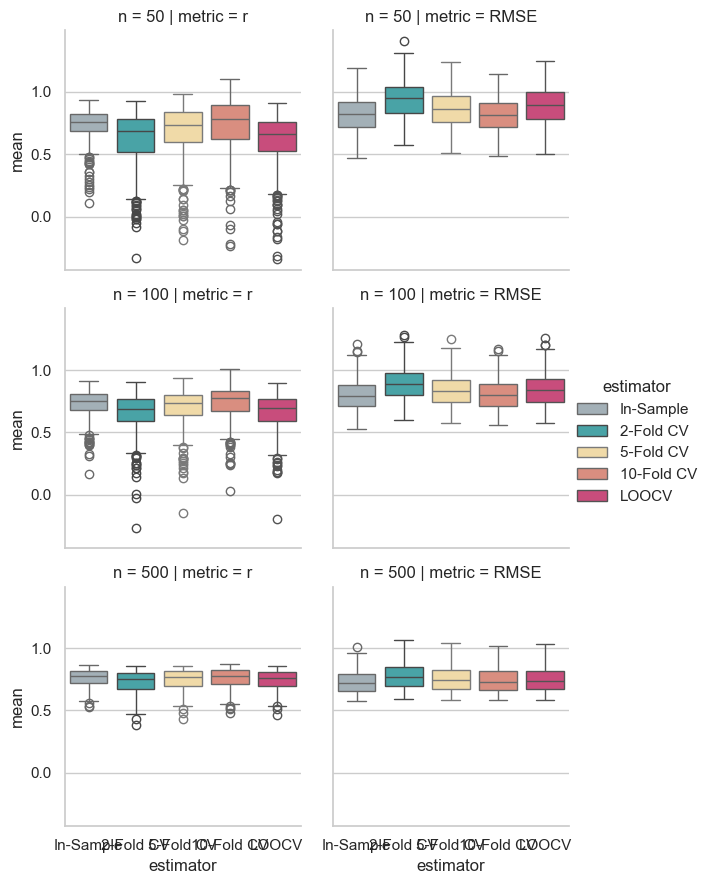

In [47]:
sns.set_theme(style="whitegrid")
palette = ["#A0B1BA", "#39B1B5", "#FCDE9C", "#E88471", "#DC3977"]
sns.FacetGrid(data.query("dataset=='spectral'"),
                col="metric", col_order=["r", "RMSE"],
                row="n", hue="estimator",
                palette=palette).map(sns.boxplot, "estimator", "mean").add_legend()

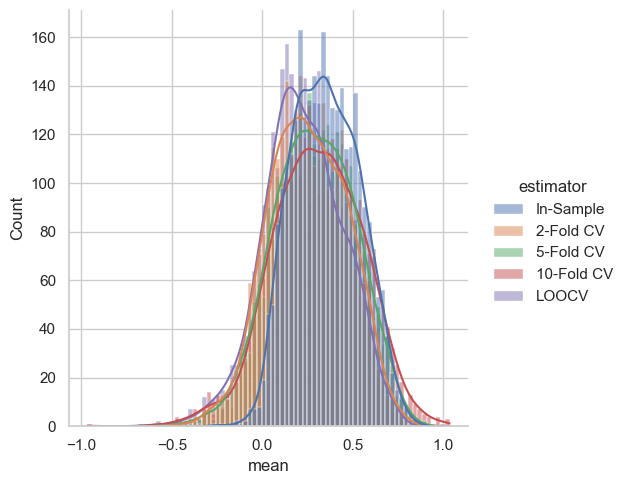

In [35]:
sns.set_theme(style="whitegrid")
sns.displot(data.query("dataset=='spectral' and metric == 'r'"),
            x="mean", hue="estimator", kde=True)

In [48]:
data.query("metric == 'r'").groupby(["dataset", "metric", "estimator", "n"]).aggregate(["mean", "std"])

mean                bias            \
                                    mean       std      mean       std   
dataset  metric estimator  n                                             
simple   r      10-Fold CV 50   0.002532  0.261665  0.002150  0.260634   
                           100 -0.010503  0.157109 -0.010573  0.157706   
                           500 -0.002150  0.063318 -0.003369  0.063972   
                2-Fold CV  50   0.007753  0.214193  0.007371  0.213820   
                           100 -0.014505  0.140962 -0.014575  0.140930   
                           500  0.004938  0.057484  0.003718  0.058079   
                5-Fold CV  50  -0.002300  0.225738 -0.002682  0.224938   
                           100 -0.010446  0.150402 -0.010517  0.151152   
                           500  0.000790  0.065530 -0.000429  0.066605   
                In-Sample  50   0.857390  0.042488  0.857008  0.043183   
                           100  0.790394  0.038561  0.790324  0.040029   
                           500  0.632464  0.022983  0.631244  0.025870   
                LOOCV      50  -0.069793  0.205988 -0.070174  0.205094   
                           100 -0.050602  0.142532 -0.050673  0.143185   
                           500 -0.011915  0.064677 -0.013134  0.065466   
spectral r      10-Fold CV 50   0.741308  0.217909  0.740781  0.217346   
                           100  0.742820  0.133540  0.742827  0.134222   
                           500  0.757201  0.083215  0.758351  0.084047   
                2-Fold CV  50   0.624134  0.211877  0.623606  0.211517   
                           100  0.662665  0.148140  0.662672  0.148969   
                           500  0.727072  0.091662  0.728222  0.092409   
                5-Fold CV  50   0.692636  0.198603  0.692108  0.198404   
                           100  0.704523  0.140175  0.704529  0.140928   
                           500  0.747242  0.085085  0.748392  0.085803   
                In-Sample  50   0.739490  0.121939  0.738962  0.121699   
                           100  0.731928  0.103447  0.731935  0.104604   
                           500  0.759348  0.074919  0.760498  0.075587   
                LOOCV      50   0.612102  0.205273  0.611574  0.204787   
                           100  0.667586  0.138270  0.667593  0.139183   
                           500  0.743425  0.081940  0.744575  0.082586   

                                variance                i              
                                    mean       std   mean         std  
dataset  metric estimator  n                                           
simple   r      10-Fold CV 50   0.357796  0.137653  249.5  144.481833  
                           100  0.123511  0.052671  249.5  144.481833  
                           500  0.020094  0.008608   99.5   57.879185  
                2-Fold CV  50   0.008549  0.011373  249.5  144.481833  
                           100  0.004696  0.007090  249.5  144.481833  
                           500  0.001227  0.001785   99.5   57.879185  
                5-Fold CV  50   0.108791  0.069418  249.5  144.481833  
                           100  0.047565  0.031232  249.5  144.481833  
                           500  0.008427  0.006202   99.5   57.879185  
                In-Sample  50        NaN       NaN  249.5  144.481833  
                           100       NaN       NaN  249.5  144.481833  
                           500       NaN       NaN   99.5   57.879185  
                LOOCV      50        NaN       NaN  249.5  144.481833  
                           100       NaN       NaN  249.5  144.481833  
                           500       NaN       NaN   99.5   57.879185  
spectral r      10-Fold CV 50   0.238948  0.160714  249.5  144.481833  
                           100  0.063660  0.046207  249.5  144.481833  
                           500  0.007391  0.006303   99.0   57.590508  
                2-Fold CV  50   0.018216  0.034555  249.5  144.481833  
         